In [53]:
# Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Задание 1

In [54]:
# Загрузка файла HR.csv в pandas dataframe
url = 'https://raw.githubusercontent.com/IvanChekin/final_work/main/HR.csv'
df_HR = pd.read_csv(url, sep=',')
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Задание 2

In [55]:
# Рассчёт основных статистик для переменных
df_HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Задание 3

In [56]:
# Рассчёт корреляционной матрицы
correlation_matrix = df_HR.corr()

# Вывод матрицы на экран
print(correlation_matrix)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

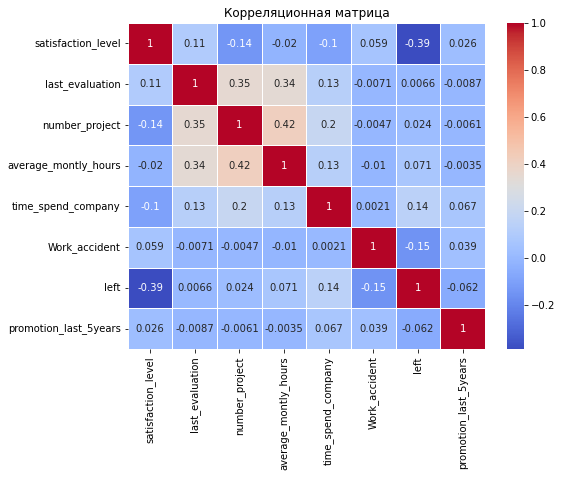

In [57]:
# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [58]:
# Значения в матрице представляют собой коэффициенты корреляции между парами переменных.
# Ближе к 1 (или -1) означает более сильную связь. Ближе к 0 — слабую связь.
# Положительный коэффициент указывает на положительную связь, а отрицательный — на отрицательную.
# Две самые скоррелированные переменные - Среднее количество часов на рабочем месте в месяц и Количество проектов, выполненных за время работы
# Две наименее скоррелированные переменные - Стаж работы в компании в годах и Происходили ли несчастные случаи на рабочем месте с сотрудником

### Задание 4

In [59]:
#  Количество сотрудников в каждом департаменте
df_HR.groupby('department')['department'].count().sort_values(ascending=False)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Задание 5

In [60]:
# Распределение сотрудников по зарплатам
df_HR.groupby('salary')['salary'].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

Text(0.5, 0, 'Количество сотрудников')

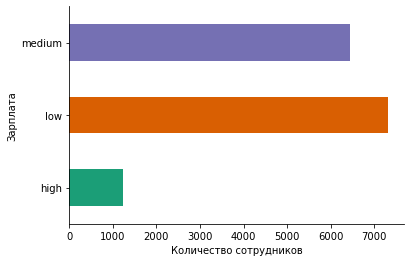

In [61]:
df_HR.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Зарплата')
plt.xlabel('Количество сотрудников')

### Задание 6

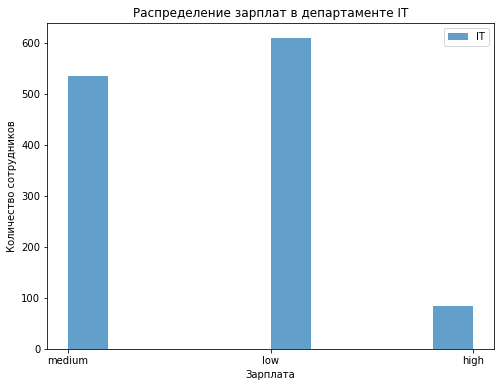

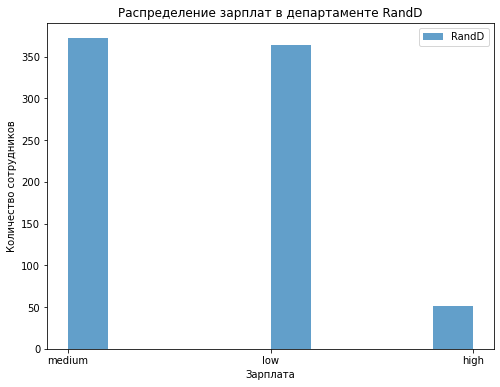

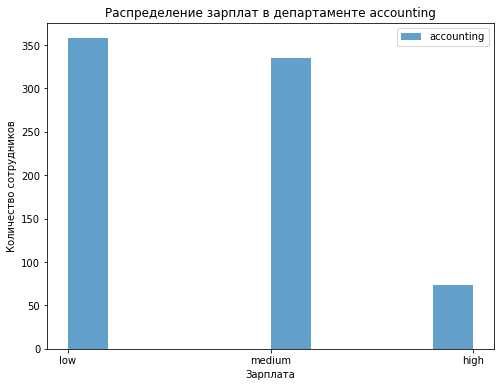

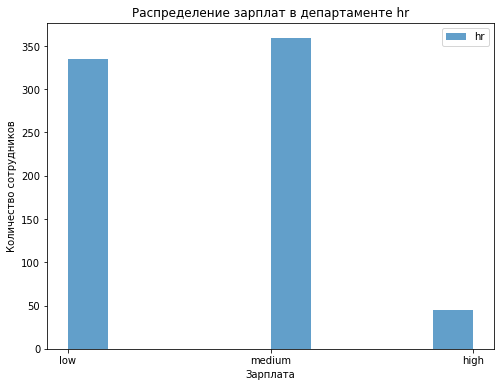

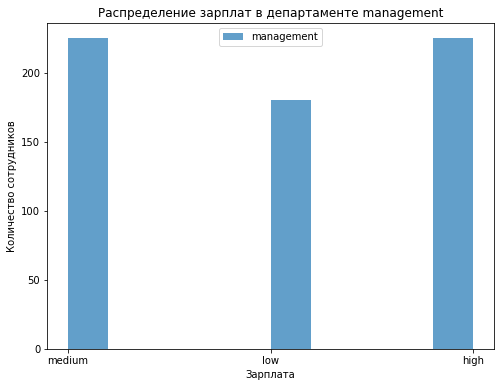

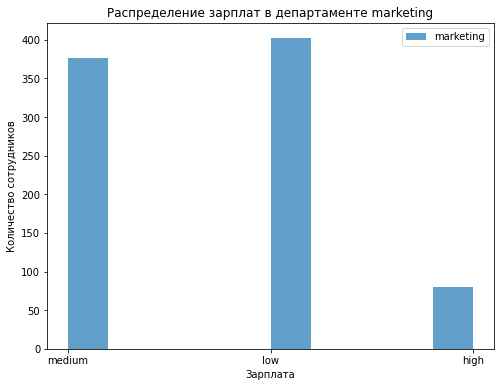

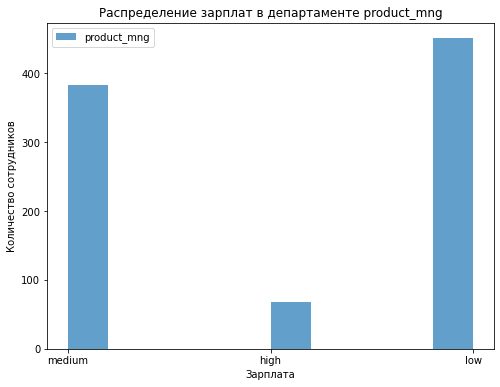

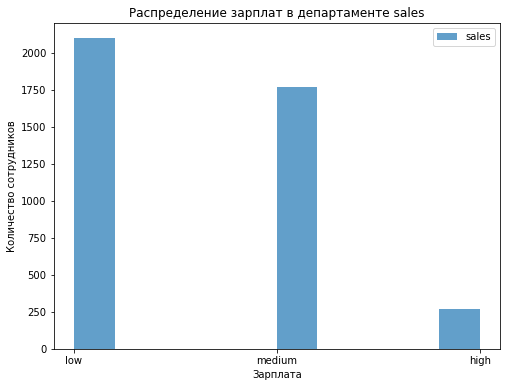

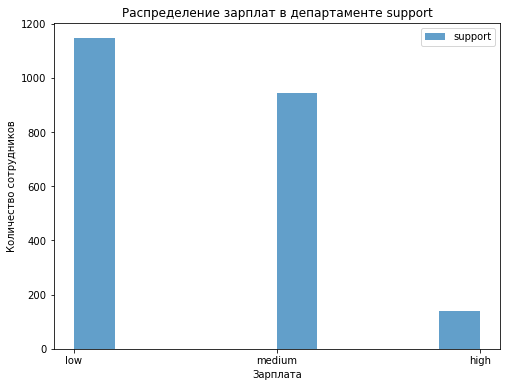

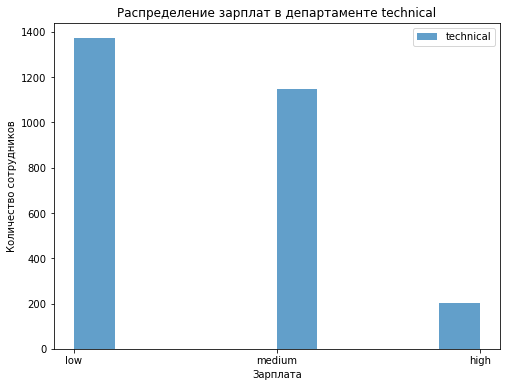

In [62]:
# Распределение сотрудников по зарплатам в каждом департаменте по отдельности
# Группировка по департаментам
grouped = df_HR.groupby('department')['salary']

# Построение гистограмм
for department, data in grouped:
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=10, alpha=0.7, label=department)
    plt.xlabel('Зарплата')
    plt.ylabel('Количество сотрудников')
    plt.title(f'Распределение зарплат в департаменте {department}')
    plt.legend()
    plt.show()

### Задание 7

In [63]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

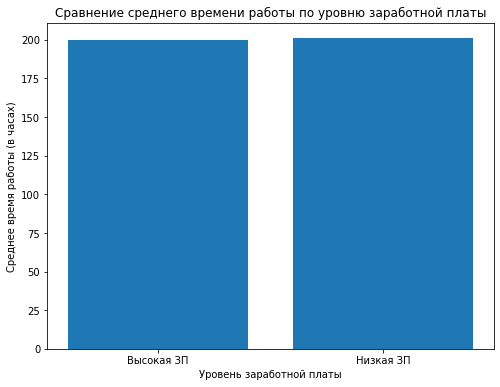

Среднее время работы (в часах) для сотрудников с высоким окладом: 199.87
Среднее время работы (в часах) для сотрудников с низким окладом: 201.00
p-значение t-теста: 0.4661
p-значение t-теста > 0.05 значит нулевая гипотеза не отклоняется
Сотрудники с высоким окладом НЕ проводят на работе больше времени, чем сотрудники с низким окладом


In [64]:
# Разделение данных по уровню оклада
high_salary = df_HR[df_HR['salary'] == 'high']
low_salary = df_HR[df_HR['salary'] == 'low']

# Рассчет среднего времени работы
mean_high_salary_hours = high_salary['average_montly_hours'].mean()
mean_low_salary_hours = low_salary['average_montly_hours'].mean()

# Проведение t-теста
t_statistic, p_value = ttest_ind(high_salary['average_montly_hours'], low_salary['average_montly_hours'])

# Визуализация
plt.figure(figsize=(8, 6))
plt.bar(['Высокая ЗП', 'Низкая ЗП'], [mean_high_salary_hours, mean_low_salary_hours])
plt.xlabel('Уровень заработной платы')
plt.ylabel('Среднее время работы (в часах)')
plt.title('Сравнение среднего времени работы по уровню заработной платы')
plt.show()

# Выводы
print(f"Среднее время работы (в часах) для сотрудников с высоким окладом: {mean_high_salary_hours:.2f}")
print(f"Среднее время работы (в часах) для сотрудников с низким окладом: {mean_low_salary_hours:.2f}")
print(f"p-значение t-теста: {p_value:.4f}")
print(f"p-значение t-теста > 0.05 значит нулевая гипотеза не отклоняется")
print(f"Сотрудники с высоким окладом НЕ проводят на работе больше времени, чем сотрудники с низким окладом")

### Задание 8

In [65]:
# Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# Доля сотрудников с повышением за последние 5 лет
# Средняя степень удовлетворенности
# Среднее количество проектов

In [66]:
# Датафрейм с уволившимися сотрудниками
df_HR_dismissed = df_HR.loc[df_HR['left'] == 1]

In [67]:
# Рассчитаем долю сотрудников с повышением
total_employees = len(df_HR_dismissed)
promoted_employees = df_HR_dismissed['promotion_last_5years'].sum()
promotion_rate = promoted_employees / total_employees
print(f"Доля сотрудников с повышением: {promotion_rate:.2%}")

Доля сотрудников с повышением: 0.53%


In [68]:
# Средняя степень удовлетворенности
print(f"Средняя степень удовлетворенности: {round(df_HR_dismissed['satisfaction_level'].mean(),2)}")

Средняя степень удовлетворенности: 0.44


In [69]:
# Среднее количество проектов
print(f"Среднее количество проектов: {round(df_HR_dismissed['number_project'].mean(),0)}")

Среднее количество проектов: 4.0


In [70]:
# Датафрейм с работающими сотрудниками
df_HR_working = df_HR.loc[df_HR['left'] != 1]

In [71]:
# Рассчитаем долю сотрудников с повышением
total_employees = len(df_HR_working)
promoted_employees = df_HR_working['promotion_last_5years'].sum()
promotion_rate = promoted_employees / total_employees
print(f"Доля сотрудников с повышением: {promotion_rate:.2%}")

Доля сотрудников с повышением: 2.63%


In [72]:
# Средняя степень удовлетворенности
print(f"Средняя степень удовлетворенности: {round(df_HR_working['satisfaction_level'].mean(),2)}")

Средняя степень удовлетворенности: 0.67


In [73]:
# Среднее количество проектов
print(f"Среднее количество проектов: {round(df_HR_working['number_project'].mean(),0)}")

Среднее количество проектов: 4.0
